In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import re
%matplotlib inline
from qiime2.plugins import feature_table
from qiime2 import Artifact
from qiime2 import Metadata
import biom
from biom import load_table
from qiime2.plugins import diversity
from scipy.stats import ttest_ind


In [2]:
cd UCSD/00_Knight_Lab/03_Extraction_test_12201/round_03_2vs20min/01_16S/synthetic_plasmids/


/Users/Justin/Google-Drive-UCSD/UCSD/00_Knight_Lab/03_Extraction_test_12201/round_03_2vs20min/01_16S/synthetic_plasmids


In [ ]:
biom convert \
  -i combined_trimmed_derep_biom_taxa_collapse.biom \
  -o combined_trimmed_derep_biom_taxa_collapse.tsv \
  --to-tsv


In [57]:
biom_collapsed = pd.read_csv('combined_trimmed_derep_biom_taxa_collapse.tsv', sep = '\t', index_col = 0, header = 1)


In [58]:
biom_collapsed.tail()


,12201.BLANK.A2.microbiome2.C,12201.BLANK.A2.microbiome20.C,12201.BLANK.A2.qiagen.C,12201.BLANK.A3.microbiome20.H,12201.BLANK.C10.microbiome2.C,12201.BLANK.C10.microbiome20.C,12201.BLANK.C10.qiagen.C,12201.BLANK.C5.microbiome2.C,12201.BLANK.C5.qiagen.C,12201.BLANK.C7.microbiome20.H,...,12201.BLANK.D10.qiagen.H,12201.bacsu.d8.1.qiagen.L,12201.built.doorknob.A.2.qiagen.L,12201.para.d7.2.qiagen.L,12201.uriF.D.1.microbiome2.L,12201.uriM.A.1.microbiome20.L,12201.uriM.A.2.microbiome2.L,12201.food.sourkraut.1.2.microbiome2.H,12201.uriM.A.3.microbiome20.L,12201.stool.mouse.S.3.microbiome2.H
#OTU ID,,,,,,,,,,,,,,,,,,,,,
EC5502_08,0.0,0.0,0.0,4.0,3.0,4.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0
EC6001_06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GA5501_11,0.0,2.0,0.0,5.0,0.0,4.0,0.0,0.0,0.0,2.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
TB5501_10,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Unassigned,372.0,11548.0,5821.0,32219.0,464.0,26304.0,9291.0,953.0,682.0,3852.0,...,445.0,1635.0,2026.0,957.0,5671.0,434.0,309.0,6710.0,541.0,91.0


In [59]:
md = pd.read_csv('../../../00_metadata/metadata_12201_2020.08.08.txt', sep='\t', index_col=0)


In [60]:
# Sum the number of reads per synthetic plasmid
plasmid_sum = biom_collapsed
plasmid_sum = plasmid_sum.apply(pd.to_numeric)
plasmid_sum['synth_sums_across_samples'] = plasmid_sum.sum(axis=1)


In [61]:
# Make table of read counts per plasmid
plasmid_sum.synth_sums_across_samples


#OTU ID
BV5501_09        90352.0
CA5501_12       106648.0
EC5001_01        31874.0
EC5002_02         3150.0
EC5003_03        48039.0
EC5004_04         3259.0
EC5005_05        65051.0
EC5501_07       111348.0
EC5502_08        43119.0
EC6001_06        10092.0
GA5501_11       127663.0
TB5501_10        84057.0
Unassigned    17650986.0
Name: synth_sums_across_samples, dtype: float64

In [ ]:
# OK great All plasmids are present at some abundance.


In [62]:
# Copy collapsed BIOM table and convert values to numeric
biom_collapsed_with_sums = biom_collapsed 
biom_collapsed_with_sums = biom_collapsed_with_sums.apply(pd.to_numeric)

# Add a row with columns sums (i.e., total synthetic plasmid reads per sample)
biom_collapsed_with_sums.loc['synth_sum'] = (biom_collapsed_with_sums.sum(axis=0) - biom_collapsed_with_sums.loc['Unassigned'])
biom_collapsed_with_sums.loc['synth_perc'] = (biom_collapsed_with_sums.loc['synth_sum'] / (biom_collapsed_with_sums.loc['Unassigned'] + biom_collapsed_with_sums.loc['synth_sum']))


In [63]:
biom_collapsed_with_sums.tail()

,12201.BLANK.A2.microbiome2.C,12201.BLANK.A2.microbiome20.C,12201.BLANK.A2.qiagen.C,12201.BLANK.A3.microbiome20.H,12201.BLANK.C10.microbiome2.C,12201.BLANK.C10.microbiome20.C,12201.BLANK.C10.qiagen.C,12201.BLANK.C5.microbiome2.C,12201.BLANK.C5.qiagen.C,12201.BLANK.C7.microbiome20.H,...,12201.BLANK.D10.qiagen.H,12201.bacsu.d8.1.qiagen.L,12201.built.doorknob.A.2.qiagen.L,12201.para.d7.2.qiagen.L,12201.uriF.D.1.microbiome2.L,12201.uriM.A.1.microbiome20.L,12201.uriM.A.2.microbiome2.L,12201.food.sourkraut.1.2.microbiome2.H,12201.uriM.A.3.microbiome20.L,12201.stool.mouse.S.3.microbiome2.H
#OTU ID,,,,,,,,,,,,,,,,,,,,,
GA5501_11,0.0,2.000000,0.000000,5.000000,0.000000,4.000000,0.000000,0.0,0.000000,2.000000,...,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
TB5501_10,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.0,0.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
Unassigned,372.0,11548.000000,5821.000000,32219.000000,464.000000,26304.000000,9291.000000,953.0,682.000000,3852.000000,...,445.000000,1635.000000,2026.0,957.000000,5671.000000,434.000000,309.000000,6710.000000,541.0,91.000000
synth_sum,0.0,2.000000,1.000000,25.000000,4.000000,16.000000,7.000000,0.0,2.000000,42332.000000,...,1.000000,2.000000,0.0,2.000000,4.000000,1.000000,1.000000,1.000000,0.0,2.000000
synth_perc,0.0,0.000173,0.000172,0.000775,0.008547,0.000608,0.000753,0.0,0.002924,0.916594,...,0.002242,0.001222,0.0,0.002086,0.000705,0.002299,0.003226,0.000149,0.0,0.021505


In [64]:
biom_collapsed_with_sums_transposed = biom_collapsed_with_sums.T

In [65]:
biom_collapsed_with_sums_transposed.head()

#OTU ID,BV5501_09,CA5501_12,EC5001_01,EC5002_02,EC5003_03,EC5004_04,EC5005_05,EC5501_07,EC5502_08,EC6001_06,GA5501_11,TB5501_10,Unassigned,synth_sum,synth_perc
12201.BLANK.A2.microbiome2.C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,372.0,0.0,0.000000
12201.BLANK.A2.microbiome20.C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,11548.0,2.0,0.000173
12201.BLANK.A2.qiagen.C,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5821.0,1.0,0.000172
12201.BLANK.A3.microbiome20.H,1.0,13.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,5.0,0.0,32219.0,25.0,0.000775
12201.BLANK.C10.microbiome2.C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,464.0,4.0,0.008547


In [66]:
md_with_biom_and_sums = pd.merge(biom_collapsed_with_sums_transposed, md, left_index=True, right_index=True)

In [67]:
md_with_biom_and_sums.head()

,BV5501_09,CA5501_12,EC5001_01,EC5002_02,EC5003_03,EC5004_04,EC5005_05,EC5501_07,EC5502_08,EC6001_06,...,sample_type_2,sample_type_3,host_subject_id,scientific_name,sex,storage_solution,swab_type,taxon_id,title,unique_sample_id
12201.BLANK.A2.microbiome2.C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,PCR extraction control,PCR extraction control,BLANK.A2.microbiome2.C,metagenome,not applicable,not applicable,not applicable,256318,Knight sample set for testing,not collected
12201.BLANK.A2.microbiome20.C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,PCR extraction control,PCR extraction control,BLANK.A2.microbiome.20.C,metagenome,not applicable,not applicable,not applicable,256318,Knight sample set for testing,not collected
12201.BLANK.A2.qiagen.C,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,PCR extraction control,PCR extraction control,BLANK.A2.standard.C,metagenome,not applicable,not applicable,not applicable,256318,Knight sample set for testing,not collected
12201.BLANK.A3.microbiome20.H,1.0,13.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,0.0,...,PCR extraction control,PCR extraction control,BLANK.A3.microbiome.20.H,metagenome,not applicable,not applicable,not applicable,256318,Knight sample set for testing,not collected
12201.BLANK.C10.microbiome2.C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,...,PCR extraction control,PCR extraction control,BLANK.C10.microbiome2.C,metagenome,not applicable,not applicable,not applicable,256318,Knight sample set for testing,not collected


In [68]:
# Export metadata with BIOM table and synthetic plasmid sums
md_with_biom_and_sums.to_csv('synthetic_plasmid_results_updated.csv', index = 1)


In [69]:
# Double-check levels for 'biomass_plate'
md_with_biom_and_sums.biomass_plate.unique()


array(['COVID-19', 'high', 'low'], dtype=object)

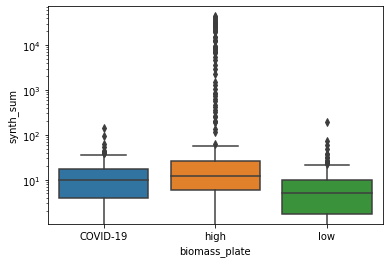

In [70]:
# OK good! The synth plasmids are in the high biomass plates more than the low biomass and COVID 
# plates (as expected since we only put into the high biomass plate)
plot_plasmids_across_plates = sns.boxplot(x = 'biomass_plate', y = 'synth_sum', data = md_with_biom_and_sums)
plot_plasmids_across_plates.set_yscale('log')


In [ ]:
## Justin stopped here


## Convert to format for making heatmaps in excel

In [44]:
# deal with A1 vs A01
plate = pd.read_csv('well-to-plate.txt', sep='\t', index_col=0)
plate.sort_index(inplace=True)

In [45]:
#pull out just one plate
std = mefil[(mefil['extraction_kit_id']=='norgen')&
            (mefil['biomass']=='high')]
#pull out columns you need
std = std[['synth_sum', 'gdna_well_id', 'synth_perc']]
# rename index
std.set_index('gdna_well_id', inplace=True)
std.sort_index(inplace=True)
# take care of A1 v A01 with well-to-plate.txt
mapit = plate.join(std)
mapit.sort_values(by='Map', inplace=True)
# remove wells where you spiked in plasmid
ecto = mapit[(mapit['Map']!='E01')&(mapit['Map']!='G02')&(mapit['Map']!='A03')&(mapit['Map']!='D04')&(mapit['Map']!='H05')&(mapit['Map']!='B06')&(mapit['Map']!='F07')&(mapit['Map']!='C08')&(mapit['Map']!='H09')&(mapit['Map']!='E10')&(mapit['Map']!='A11')]
# determine how many sample wells had snythetic plasmid
ecto['preabs'] = np.where(ecto['synth_sum']>0, 1, 0)
# what percentage of samples had contamination? 85 samples total (other 11 had plasmid spike-in)
ecto['preabs'].sum() / 85

/Users/lisamarotz/miniconda2/envs/qiime2-2020.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


0.3411764705882353

In [46]:
# of the samples that had contamination, what percentage of the reads were synthetic plasmids?
ecto[ecto['preabs']==1].synth_perc.mean()

8.512310075378255e-05

In [47]:
#### Repeat two cells above across all the differen plates

In [48]:
#pull out just one plate
std = mefil[(mefil['extraction_kit_id']=='standard')&
            (mefil['biomass']=='high')]
#pull out columns you need
std = std[['synth_sum', 'gdna_well_id', 'synth_perc']]
# rename index
std.set_index('gdna_well_id', inplace=True)
std.sort_index(inplace=True)

mapit = plate.join(std)
mapit.sort_values(by='Map', inplace=True)

ecto = mapit[(mapit['Map']!='E01')&(mapit['Map']!='G02')&(mapit['Map']!='A03')&(mapit['Map']!='D04')&(mapit['Map']!='H05')&(mapit['Map']!='B06')&(mapit['Map']!='F07')&(mapit['Map']!='C08')&(mapit['Map']!='H09')&(mapit['Map']!='E10')&(mapit['Map']!='A11')]

ecto['preabs'] = np.where(ecto['synth_sum']>0, 1, 0)
ecto['preabs'].sum() / 85

/Users/lisamarotz/miniconda2/envs/qiime2-2020.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


0.5176470588235295

In [49]:
ecto[ecto['preabs']==1].synth_perc.mean()

0.016725024393412388

In [50]:
#pull out just one plate
std = mefil[(mefil['extraction_kit_id']=='zymo')&
            (mefil['biomass']=='high')]
#pull out columns you need
std = std[['synth_sum', 'gdna_well_id', 'synth_perc']]
# rename index
std.set_index('gdna_well_id', inplace=True)
std.sort_index(inplace=True)

mapit = plate.join(std)
mapit.sort_values(by='Map', inplace=True)

ecto = mapit[(mapit['Map']!='E01')&(mapit['Map']!='G02')&(mapit['Map']!='A03')&(mapit['Map']!='D04')&(mapit['Map']!='H05')&(mapit['Map']!='B06')&(mapit['Map']!='F07')&(mapit['Map']!='C08')&(mapit['Map']!='H09')&(mapit['Map']!='E10')&(mapit['Map']!='A11')]

ecto['preabs'] = np.where(ecto['synth_sum']>0, 1, 0)
ecto['preabs'].sum() / 85

/Users/lisamarotz/miniconda2/envs/qiime2-2020.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


0.6235294117647059

In [51]:
ecto[ecto['preabs']==1].synth_perc.mean()

0.006004607923513195

In [52]:
#pull out just one plate
std = mefil[(mefil['extraction_kit_id']=='magmax')&
            (mefil['biomass']=='high')]
#pull out columns you need
std = std[['synth_sum', 'gdna_well_id', 'synth_perc']]
# rename index
std.set_index('gdna_well_id', inplace=True)
std.sort_index(inplace=True)

mapit = plate.join(std)
mapit.sort_values(by='Map', inplace=True)

ecto = mapit[(mapit['Map']!='E01')&(mapit['Map']!='G02')&(mapit['Map']!='A03')&(mapit['Map']!='D04')&(mapit['Map']!='H05')&(mapit['Map']!='B06')&(mapit['Map']!='F07')&(mapit['Map']!='C08')&(mapit['Map']!='H09')&(mapit['Map']!='E10')&(mapit['Map']!='A11')]

ecto['preabs'] = np.where(ecto['synth_sum']>0, 1, 0)
ecto['preabs'].sum() / 85

/Users/lisamarotz/miniconda2/envs/qiime2-2020.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


0.7294117647058823

In [53]:
ecto[ecto['preabs']==1].synth_perc.mean()

0.001451752704454488

In [54]:
#pull out just one plate
std = mefil[(mefil['extraction_kit_id']=='homebrew')&
            (mefil['biomass']=='high')]
#pull out columns you need
std = std[['synth_sum', 'gdna_well_id', 'synth_perc']]
# rename index
std.set_index('gdna_well_id', inplace=True)
std.sort_index(inplace=True)

mapit = plate.join(std)
mapit.sort_values(by='Map', inplace=True)

ecto = mapit[(mapit['Map']!='E01')&(mapit['Map']!='G02')&(mapit['Map']!='A03')&(mapit['Map']!='D04')&(mapit['Map']!='H05')&(mapit['Map']!='B06')&(mapit['Map']!='F07')&(mapit['Map']!='C08')&(mapit['Map']!='H09')&(mapit['Map']!='E10')&(mapit['Map']!='A11')]

ecto['preabs'] = np.where(ecto['synth_sum']>0, 1, 0)
ecto['preabs'].sum() / 85

/Users/lisamarotz/miniconda2/envs/qiime2-2020.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


0.4470588235294118

In [55]:
ecto[ecto['preabs']==1].synth_perc.mean()

0.001238529930245385

In [56]:
#pull out just one plate
std = mefil[(mefil['extraction_kit_id']=='pro')&
            (mefil['biomass']=='high')]
#pull out columns you need
std = std[['synth_sum', 'gdna_well_id', 'synth_perc']]
# rename index
std.set_index('gdna_well_id', inplace=True)
std.sort_index(inplace=True)

mapit = plate.join(std)
mapit.sort_values(by='Map', inplace=True)

ecto = mapit[(mapit['Map']!='E01')&(mapit['Map']!='G02')&(mapit['Map']!='A03')&(mapit['Map']!='D04')&(mapit['Map']!='H05')&(mapit['Map']!='B06')&(mapit['Map']!='F07')&(mapit['Map']!='C08')&(mapit['Map']!='H09')&(mapit['Map']!='E10')&(mapit['Map']!='A11')]

ecto['preabs'] = np.where(ecto['synth_sum']>0, 1, 0)
ecto['preabs'].sum() / 85

/Users/lisamarotz/miniconda2/envs/qiime2-2020.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


0.5176470588235295

In [57]:
ecto[ecto['preabs']==1].synth_perc.mean()

0.0010061119340222617